# Data Preprocessing

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import os
import numpy as np
import random
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler,OneHotEncoder,OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [2]:
# Set Random Seed = 42
SEED = 300
random.seed(SEED)
np.random.seed(SEED)

In [3]:
# Read Data and show the first five rows
data = pd.read_csv('2A.tsv', sep='\t')
data.head()

Customer ID  Birth Date Gender Item Purchased  Category  \
0            1  1969/03/05   Male         Blouse  Clothing   
1            2  2005/07/01   Male        Sweater  Clothing   
2            3  1974/12/01   Male          Jeans  Clothing   
3            4  2003/11/21   Male        Sandals  Footwear   
4            5  1979/09/13   Male         Blouse  Clothing   

   Purchase Amount (USD)       Location Size      Color  Season  \
0                     53       Kentucky    L       Gray  Winter   
1                     64          Maine    L     Maroon  Winter   
2                     73  Massachusetts    S     Maroon  Spring   
3                     90   Rhode Island    M     Maroon  Spring   
4                     49         Oregon    M  Turquoise  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  
0                    Venmo            Fortnightly  
1                     Cash            Fortnightly  
2              Credit Card                 Weekly  
3                   PayPal                 Weekly  
4                   PayPal               Annually

In [4]:
# Drop Identifier
data.drop(columns=["Customer ID"], inplace=True)

In [5]:
# Converting 'Birth Date' column to 'Age' column

# Converting 'Birth Date' to datetime format
data['Birth Date'] = pd.to_datetime(data['Birth Date'])

def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

data['Age'] = data['Birth Date'].apply(calculate_age)

# Column drop
data.drop(columns=['Birth Date'], inplace=True)

In [6]:
# Show the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    3900 non-null   object 
 1   Item Purchased            3900 non-null   object 
 2   Category                  3900 non-null   object 
 3   Purchase Amount (USD)     3900 non-null   int64  
 4   Location                  3900 non-null   object 
 5   Size                      3900 non-null   object 
 6   Color                     3900 non-null   object 
 7   Season                    3900 non-null   object 
 8   Review Rating             3900 non-null   float64
 9   Subscription Status       3900 non-null   object 
 10  Payment Method            3900 non-null   object 
 11  Shipping Type             3900 non-null   object 
 12  Discount Applied          3900 non-null   object 
 13  Promo Code Used           3900 non-null   object 
 14  Previous

In [7]:
# Count the total missing value for each column
data.isna().sum()

Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
Age                         0
dtype: int64

Tidak terdapat missing value pada dataset ini sehingga tidak perlu penanganan missing value

In [8]:
# Data description
data.describe()

Purchase Amount (USD)  Review Rating  Previous Purchases          Age
count            3900.000000    3900.000000         3900.000000  3900.000000
mean               59.764359       3.749949           25.351538    44.113333
std                23.685392       0.716223           14.447125    15.209083
min                20.000000       2.500000            1.000000    18.000000
25%                39.000000       3.100000           13.000000    31.000000
50%                60.000000       3.700000           25.000000    44.000000
75%                81.000000       4.400000           38.000000    57.000000
max               100.000000       5.000000           50.000000    71.000000

In [9]:
# Show the column in the dataset
data.columns

Index(['Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases', 'Age'],
      dtype='object')

In [10]:
# Calculate duplicated data
data.duplicated().sum()

0

Tidak terdapat data yang duplikat sehingga tidak perlu penanganan data yang duplikat

In [11]:
# Show the number of unique values for each column
unique_counts = data.nunique()
print(unique_counts)

Gender                       4
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Payment Method               6
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Preferred Payment Method     6
Frequency of Purchases       7
Age                         54
dtype: int64


In [12]:
# Drop Item Purchased Column
data.drop(columns=["Item Purchased"], inplace=True)

# EDA

In [13]:
# Differentiating between numerical and categorical columns
cat_cols = []
num_cols = []

for i in data.columns:
    if 'int' in str(data[i].dtype) or 'float' in str(data[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']
Numeric: ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Age']


## Numerical Columns

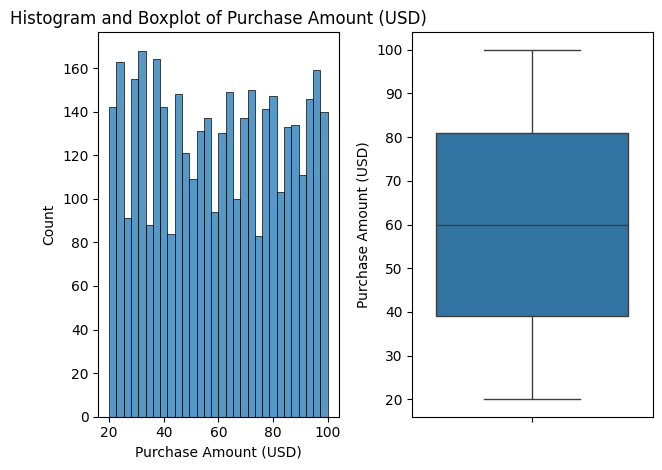

Skewness:  0.012701757626433795
Kurtosis:  -1.236593691266159


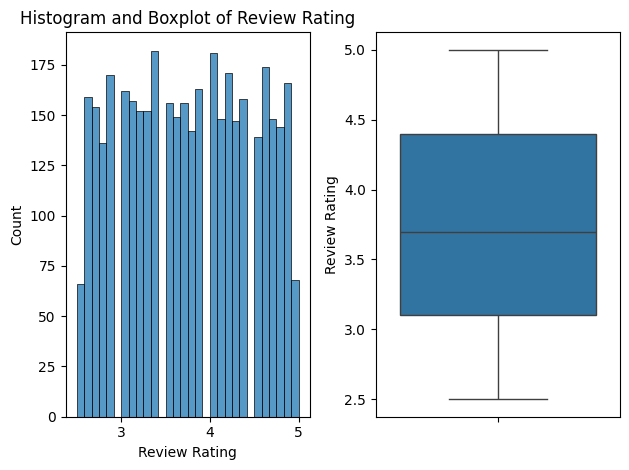

Skewness:  0.00452459644246527
Kurtosis:  -1.1796283021299137


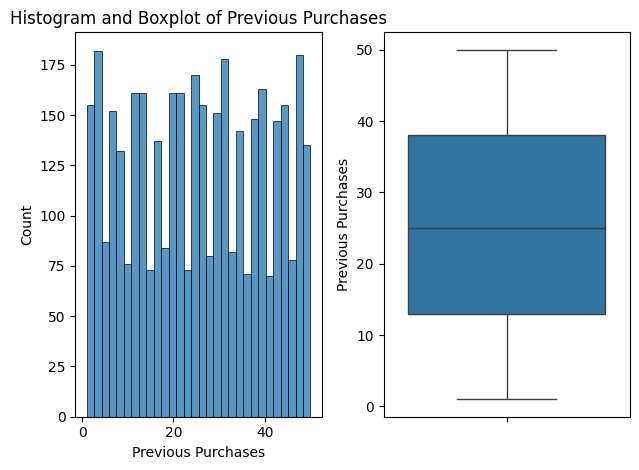

Skewness:  0.0031211555127652127
Kurtosis:  -1.1901873846405375


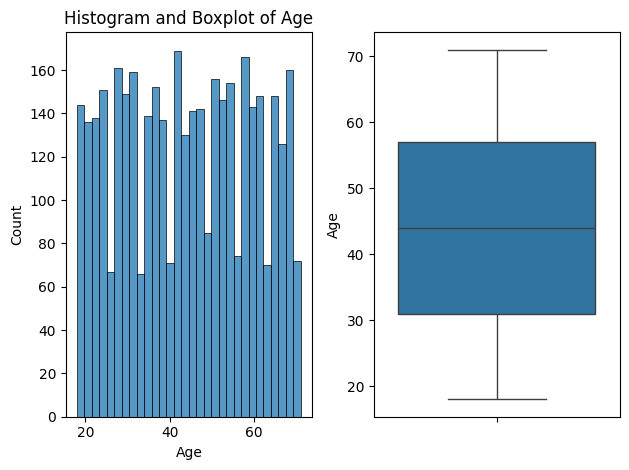

Skewness:  -0.00595841926110995
Kurtosis:  -1.1934712944349049


In [14]:
# Creating histogram and boxplot to visualize numerical distribution
for i in num_cols:
    plt.subplot(1,2,1)
    sns.histplot(data[i], bins = 30)
    plt.title(f"Histogram and Boxplot of {i}")

    plt.subplot(1,2,2)
    sns.boxplot(data[i])
    plt.tight_layout()
    plt.show()
    print("Skewness: ", data[i].skew())
    print("Kurtosis: ", data[i].kurt())

The histogram and boxplot displayed provide an overview of the distribution of various data attributes. Attributes such as Purchase Amount (USD) and Previous Purchases show a distribution that tends to be symmetric with little to no significant outliers, as seen from the boxplot. Review Rating has a relatively uniform distribution with a smaller range of values, indicating consistency in ratings. On the other hand, the distribution of Age appears fairly even without any extreme skew, with the boxplot showing a concentrated range of values without significant outliers. Overall, the distribution of data in these attributes reflects controlled variability and can be used for further analysis without special treatment for outliers

Skewness values indicate the degree of asymmetry or skew in the data distribution. If skewness is between -0.5 and 0.5, the distribution is considered nearly symmetric. A positive skewness (>0) indicates a right skew, where the tail of the distribution is longer on the right side, while negative skewness (<0) indicates a left skew, where the tail is longer on the left side. Distributions with skewness between -1 and -0.5 or 0.5 and 1 are considered moderately skewed, while skewness below -1 or above 1 indicates a highly skewed distribution that may require data transformation for further analysis

Kurtosis values help in understanding the shape of the data distribution, especially in measuring the peak height and tail thickness. Kurtosis indicates how sharp or flat the peak of the distribution is compared to a normal distribution. If the kurtosis value is close to 3, the distribution is called mesokurtic, similar to the normal distribution, with a moderate peak and standard tail thickness. On the other hand, if the kurtosis value is less than 3, the distribution is called platykurtic, with a flatter peak and thinner tails, indicating that the data tends to be more evenly spread out

## Categorical Distribution

In [15]:
# Check the distribution for categorical columns
for col in cat_cols:
    print(data[col].value_counts())
    print("\n")

Gender
Male      2642
Female    1231
f           17
M           10
Name: count, dtype: int64


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Al

The distribution of categorical data provides insights into various customer and transaction attributes. In the Gender attribute, the majority of customers are Male (2642), followed by Female (1231), but there is inconsistency in the data with entries 'f' and 'M', requiring data cleaning. In the Category attribute, Clothing dominates (1737), followed by Accessories (1240), indicating customers' main preference for clothing

For Location, the data shows a relatively even distribution across different states, with the highest number of customers from Montana (96) and the lowest from Rhode Island (63), indicating geographic diversity. In the Size attribute, size M is the most common (1755), followed by L (1053), reflecting the popularity of medium sizes. The product color choices vary, with Olive (177) being the most popular, followed by Yellow (174) and Silver (173), showing a fairly balanced color preference

The Season attribute shows consistent sales throughout the year, with peaks in Spring (999) and a slight drop in Summer (955). Regarding Subscription Status, the majority of customers are non-subscribed (No, 2847), indicating potential for increasing subscription conversion

The most commonly used Payment Methods are Credit Card (696) and Venmo (653), while Bank Transfer is the least used (632). For Shipping Type, Free Shipping (675) is the preferred choice, indicating customers' preference for shipping cost savings. Most customers do not use discounts (No, 2223), but a significant number of others utilize discounts (Yes, 1677), similar to the trend in promo code usage

Preferred Payment Methods show a strong preference for PayPal (677) and Credit Card (671), while the Frequency of Purchases is fairly evenly distributed, with the highest frequency being Every 3 Months (584) and the lowest being Weekly (539). Overall, this data provides valuable insights into customer behavior and identifies areas to enhance marketing strategies

## Handling Anomalies

In [16]:
# Cleaning anomalies in the 'Gender' column and making the data more consistent
data['Gender'] = data['Gender'].str.upper().replace({
    'MALE': 'M',
    'FEMALE': 'F'
})

# Count the total of male and female
gender_counts = data['Gender'].value_counts()
print(gender_counts)

Gender
M    2652
F    1248
Name: count, dtype: int64


In [17]:
# Transforming data with same meanings
correction = {
    'Bi-Weekly': 'Fortnightly',
    'Quarterly': 'Every 3 Months'
}

data['Frequency of Purchases'] = data['Frequency of Purchases'].replace(correction)

## Heatmap

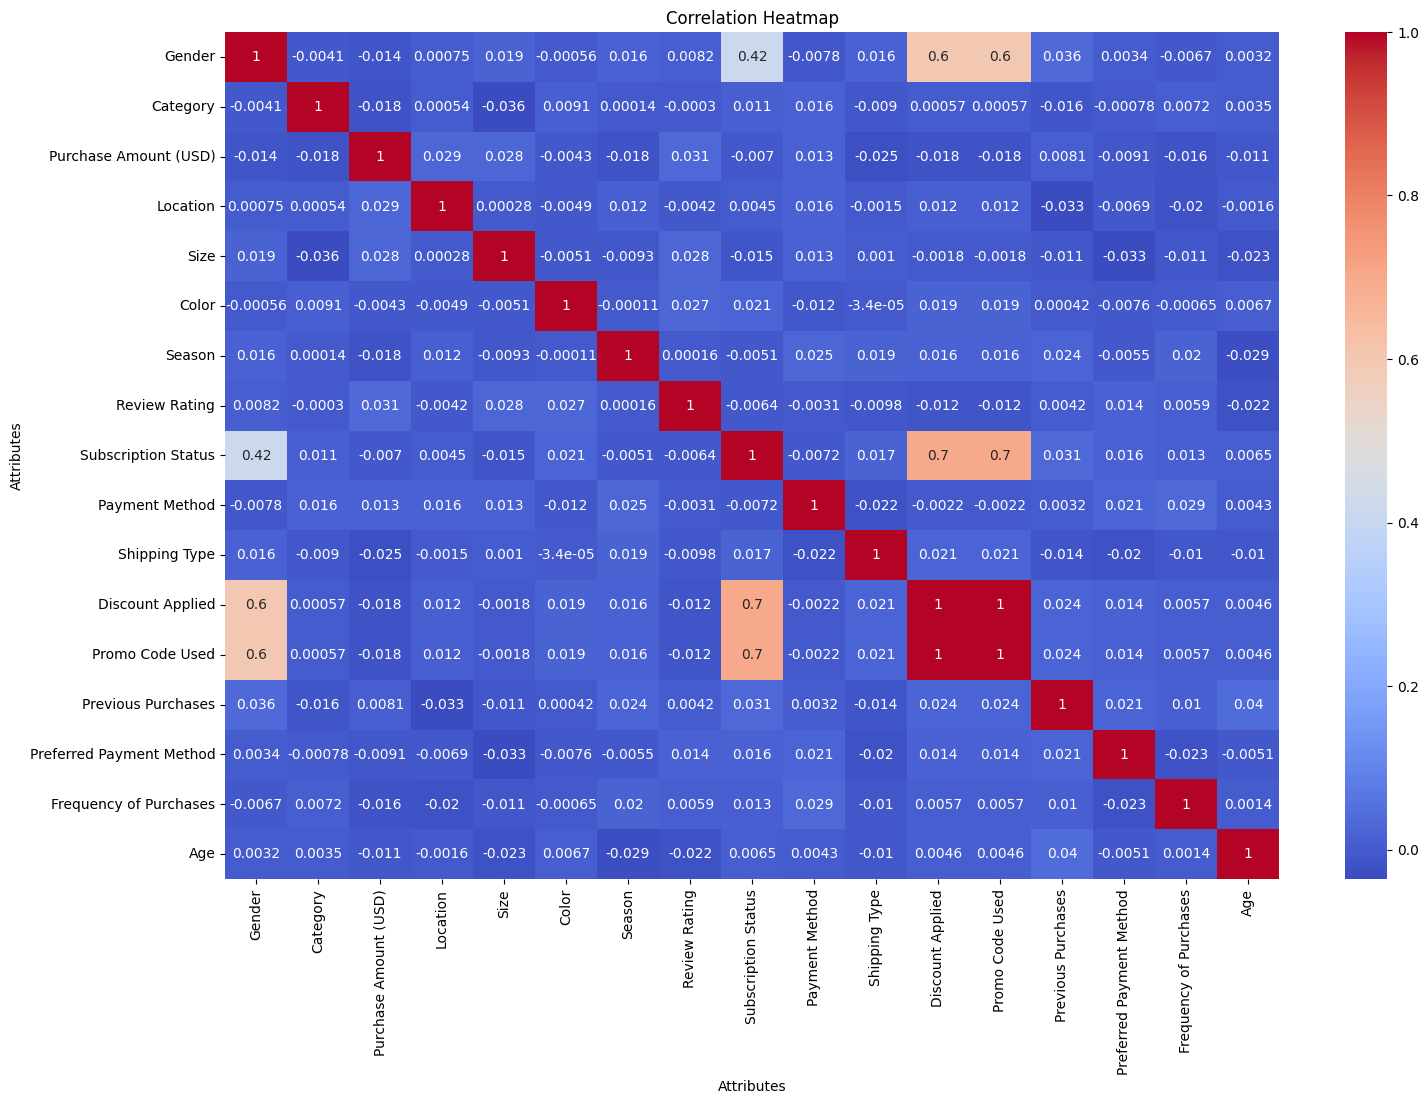

In [18]:
# Creating a correlation heatmap
from sklearn.preprocessing import LabelEncoder
df = data.copy()

bin_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = bin_enc.fit_transform(df[col].astype(str))

correlation_matrix_all = df.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

The correlation heatmap shows that most attributes have weak or insignificant relationships with each other, with a few exceptions. A strong relationship is observed between Discount Applied and Promo Code Used (0.7), indicating that the use of promo codes often coincides with discounts being applied. Additionally, Gender has a moderate correlation with Subscription Status (0.42) and Discount Applied (0.6), suggesting its influence on subscription status and discount application. In contrast, attributes such as Age and Location exhibit very low correlations with most other variables, indicating their minimal impact within this dataset

## Correlation Pairplot

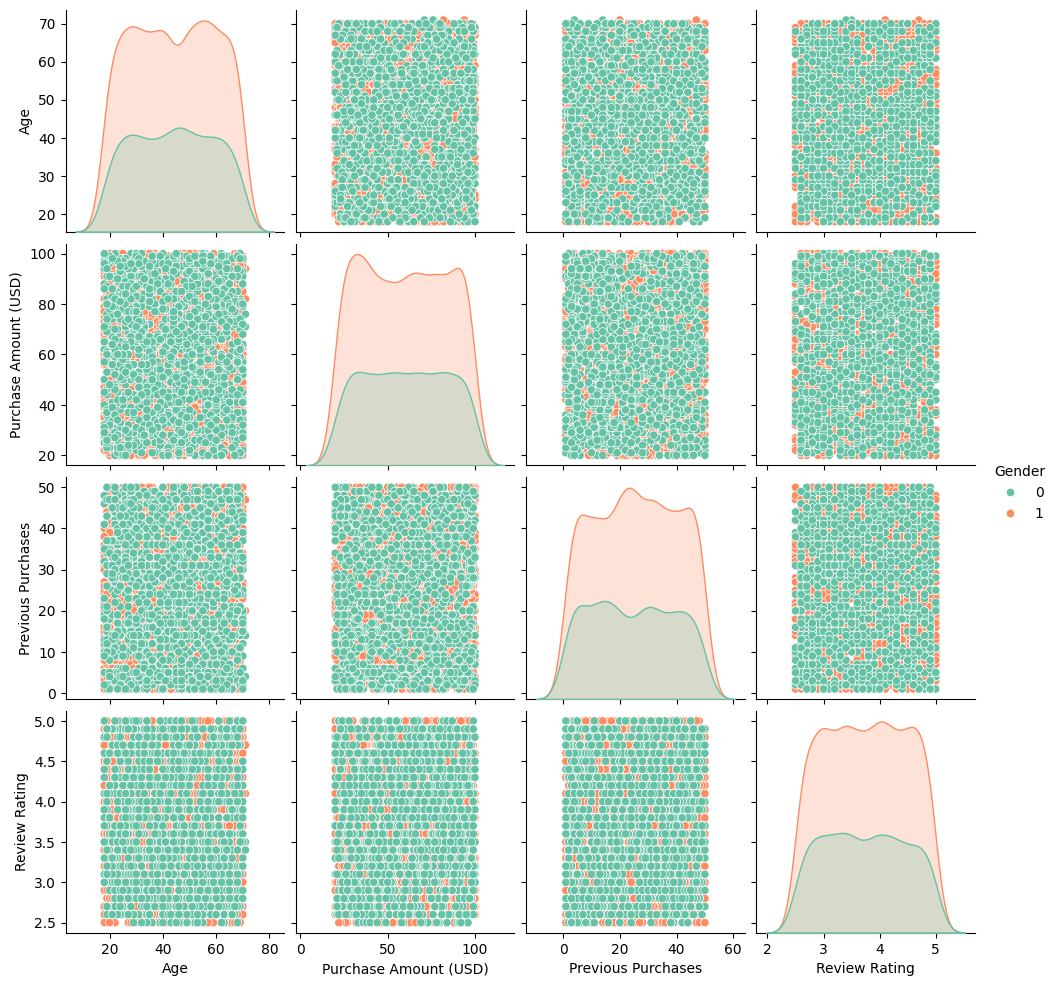

In [19]:
# Pairplot
sns.pairplot(df, vars=['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating'],
                hue='Gender', palette='Set2', diag_kind='kde')
plt.show()

This pairplot shows the distribution and relationships between numerical variables such as Age, Purchase Amount (USD), Previous Purchases, and Review Rating, with Gender as the distinguishing category. The distribution of Age is concentrated within the 20-50 age range, while Purchase Amount (USD) and Previous Purchases exhibit a relatively uniform spread without notable outliers. Review Rating is evenly distributed across all categories, indicating no significant specific patterns between ratings and other variables. The relationships between variables appear neither strong nor linear, suggesting that each variable may contribute independently to further analysis

# Feature Engineering

## Mapping

### Mapping Location

In [20]:
# Mapping Locations based on Regions
region_mapping = {
    'NORTH': ['Montana', 'Idaho', 'Illinois', 'Minnesota', 'Nebraska', 'North Dakota', 'New York', 'Vermont', 'Wisconsin', 'Michigan', 'Maine', 'New Hampshire', 'South Dakota', 'Iowa'],
    'WEST': ['California', 'Nevada', 'Oregon', 'Washington', 'Alaska', 'Wyoming', 'Utah', 'Hawaii', 'Arizona'],
    'EAST': ['Delaware', 'Maryland', 'New Jersey', 'Massachusetts', 'Rhode Island', 'Connecticut', 'Pennsylvania', 'New York'],
    'SOUTH': ['Alabama', 'Louisiana', 'Mississippi', 'Georgia', 'Kentucky', 'Arkansas', 'North Carolina', 'Virginia', 'Tennessee', 'Texas', 'South Carolina', 'Florida'],
    'MIDWEST': ['Ohio', 'Indiana', 'Missouri', 'West Virginia', 'Colorado', 'Oklahoma', 'Kansas']
}

def categorize_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'OTHERS'

data['Location'] = data['Location'].apply(categorize_region)
data.head()

Gender  Category  Purchase Amount (USD) Location Size      Color  Season  \
0      M  Clothing                     53    SOUTH    L       Gray  Winter   
1      M  Clothing                     64    NORTH    L     Maroon  Winter   
2      M  Clothing                     73     EAST    S     Maroon  Spring   
3      M  Footwear                     90     EAST    M     Maroon  Spring   
4      M  Clothing                     49     WEST    M  Turquoise  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  Age  
0                    Venmo            Fortnightly   55  
1                     Cash            Fortnightly   19  
2              Credit Card                 Weekly   50  
3                   PayPal                 Weekly   21  
4                   PayPal               Annually   45

### Mapping Color

In [21]:
# Mapping colors based on general color
color_mapping = {
    'Olive': 'Green', 'Yellow': 'Yellow', 'Silver': 'Gray', 'Teal': 'Blue', 
    'Green': 'Green', 'Black': 'Black', 'Cyan': 'Blue', 'Violet': 'Purple',
    'Gray': 'Gray', 'Maroon': 'Red', 'Orange': 'Orange', 'Charcoal': 'Gray',
    'Pink': 'Pink', 'Magenta': 'Pink', 'Blue': 'Blue', 'Purple': 'Purple',
    'Peach': 'Orange', 'Red': 'Red', 'Beige': 'Brown', 'Indigo': 'Blue', 
    'Lavender': 'Purple', 'Turquoise': 'Blue', 'White': 'White', 
    'Brown': 'Brown', 'Gold': 'Yellow'
}

# Change color column with color_mapping
data['Color'] = data['Color'].map(color_mapping)

In [22]:
# Show the first five data after mapping
data.head()

Gender  Category  Purchase Amount (USD) Location Size Color  Season  \
0      M  Clothing                     53    SOUTH    L  Gray  Winter   
1      M  Clothing                     64    NORTH    L   Red  Winter   
2      M  Clothing                     73     EAST    S   Red  Spring   
3      M  Footwear                     90     EAST    M   Red  Spring   
4      M  Clothing                     49     WEST    M  Blue  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  Age  
0                    Venmo            Fortnightly   55  
1                     Cash            Fortnightly   19  
2              Credit Card                 Weekly   50  
3                   PayPal                 Weekly   21  
4                   PayPal               Annually   45

In [23]:
# One hot encoding -> Category, Color, Season, Payment Method, Shipping Type, Preferred Payment Method
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder
ohe_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
categorical_columns = ['Category', 'Location', 'Color', 'Season', 'Payment Method', 'Shipping Type', 'Preferred Payment Method', 'Frequency of Purchases']
one_hot_encoded = ohe_enc.fit_transform(data[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_enc.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
data = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
data = data.drop(categorical_columns, axis=1)

In [24]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

data['Gender'] = label_encoding.fit_transform(data['Gender'])
data['Size'] = label_encoding.fit_transform(data['Size'])
data['Subscription Status'] = label_encoding.fit_transform(data['Subscription Status'])
data['Promo Code Used'] = label_encoding.fit_transform(data['Promo Code Used'])
data['Discount Applied'] = label_encoding.fit_transform(data['Discount Applied'])   

In [25]:
# Check the data after encoding
data.head()

Gender  Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0       1                     53     0            3.1                    1   
1       1                     64     0            3.1                    1   
2       1                     73     2            3.1                    1   
3       1                     90     1            3.5                    1   
4       1                     49     1            2.7                    1   

   Discount Applied  Promo Code Used  Previous Purchases  Age  \
0                 1                1                  14   55   
1                 1                1                   2   19   
2                 1                1                  23   50   
3                 1                1                  49   21   
4                 1                1                  31   45   

   Category_Accessories  ...  Preferred Payment Method_Cash  \
0                   0.0  ...                            0.0   
1                   0.0  ...                            1.0   
2                   0.0  ...                            0.0   
3                   0.0  ...                            0.0   
4                   0.0  ...                            0.0   

   Preferred Payment Method_Credit Card  Preferred Payment Method_Debit Card  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   1.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

   Preferred Payment Method_PayPal  Preferred Payment Method_Venmo  \
0                              0.0                             1.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              1.0                             0.0   
4                              1.0                             0.0   

   Frequency of Purchases_Annually  Frequency of Purchases_Every 3 Months  \
0                              0.0                                    0.0   
1                              0.0                                    0.0   
2                              0.0                                    0.0   
3                              0.0                                    0.0   
4                              1.0                                    0.0   

   Frequency of Purchases_Fortnightly  Frequency of Purchases_Monthly  \
0                                 1.0                             0.0   
1                                 1.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   

   Frequency of Purchases_Weekly  
0                            0.0  
1                            0.0  
2                            1.0  
3                            1.0  
4                            0.0  

[5 rows x 57 columns]

# Scaling

In [26]:
standard_scaler = StandardScaler()
data[data.columns] = standard_scaler.fit_transform(data[data.columns])

# Dimensionality Reduction

In [27]:
# Performing PCA Fit on the Dataset
pca = PCA()
pca.fit(data)

PCA()

Text(0, 0.5, 'Eigenvalues')

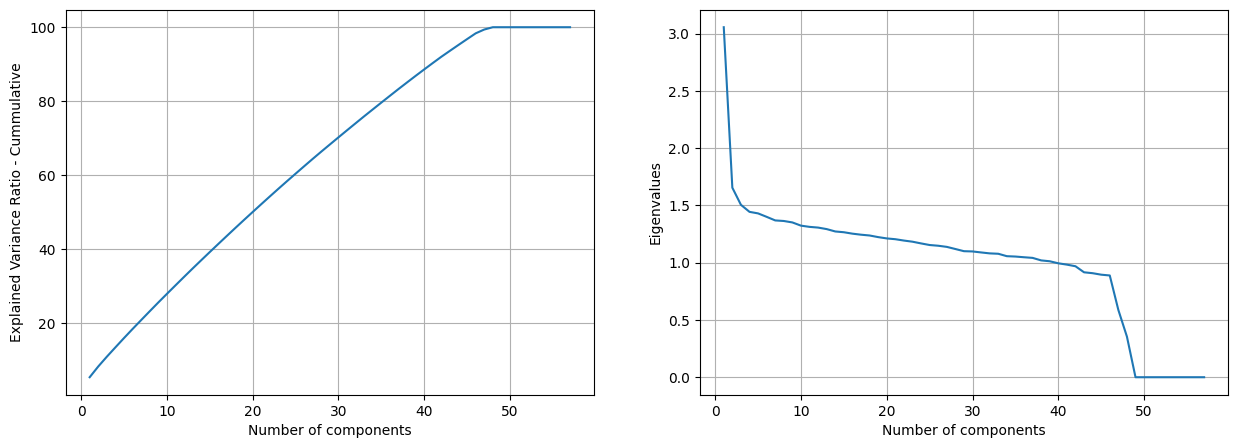

In [28]:
# Visualizing PCA: Explained Variance and Eigenvalues
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(data.columns)+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(data.columns)+1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Based on the graph, we can see that the more components used, the greater the variance of the data explained. However, the first five components already capture most of the information in the data, with a total explained variance approaching 50%-60%. In the eigenvalues graph (right), there is an elbow or a significant drop at the fifth component, indicating that the additional contribution to variance after the fifth component becomes very small. Therefore, to strike a balance between retaining important information and simplifying data dimensions, n_components = 5 was chosen

In [99]:
# Data transformation using PCA with 3 principal components for dimensionality reduction
pca_comp = PCA(n_components=5)
data_pca = pca_comp.fit_transform(data)

In [100]:
data_pca

array([[ 2.34777332,  1.31672961, -0.87105252, -0.79854285, -1.55088058],
       [ 2.18350856,  1.40784295,  0.59145819, -0.85922955, -1.10893827],
       [ 2.25311573,  1.96375946, -0.94606134, -0.02417011,  1.44898761],
       ...,
       [-1.73190273, -1.43909168,  0.27245448,  0.19397611,  0.17702443],
       [-1.80686844, -1.11532457,  1.10565818, -0.5353211 ,  0.93291089],
       [-1.69156689, -1.20241832, -0.93847922,  0.81513003,  1.31759294]])

# Clustering

In [101]:
# Evaluating K-Means with Distortion and Silhouette Scores for Various Cluster Numbers
distortions = []
silhouettes = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=SEED)
    cluster_label=kmeanModel.fit_predict(data_pca)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_pca, cluster_label)
    print(
        "For n_clusters =", k,
        "The average silhouette_score is :", silhouette_avg,
        )

    distortions.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_avg)

c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.30235327989710803


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.25015725355079615


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.24854861201321


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.22575883505902283


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.22430698042969394


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.21152301602782694


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.21042628005624806


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.20447166449827192


Based on the silhouette score for each cluster, we can conclude that the best cluster is at n_clusters = 2, as it has the highest value compared to other n_clusters

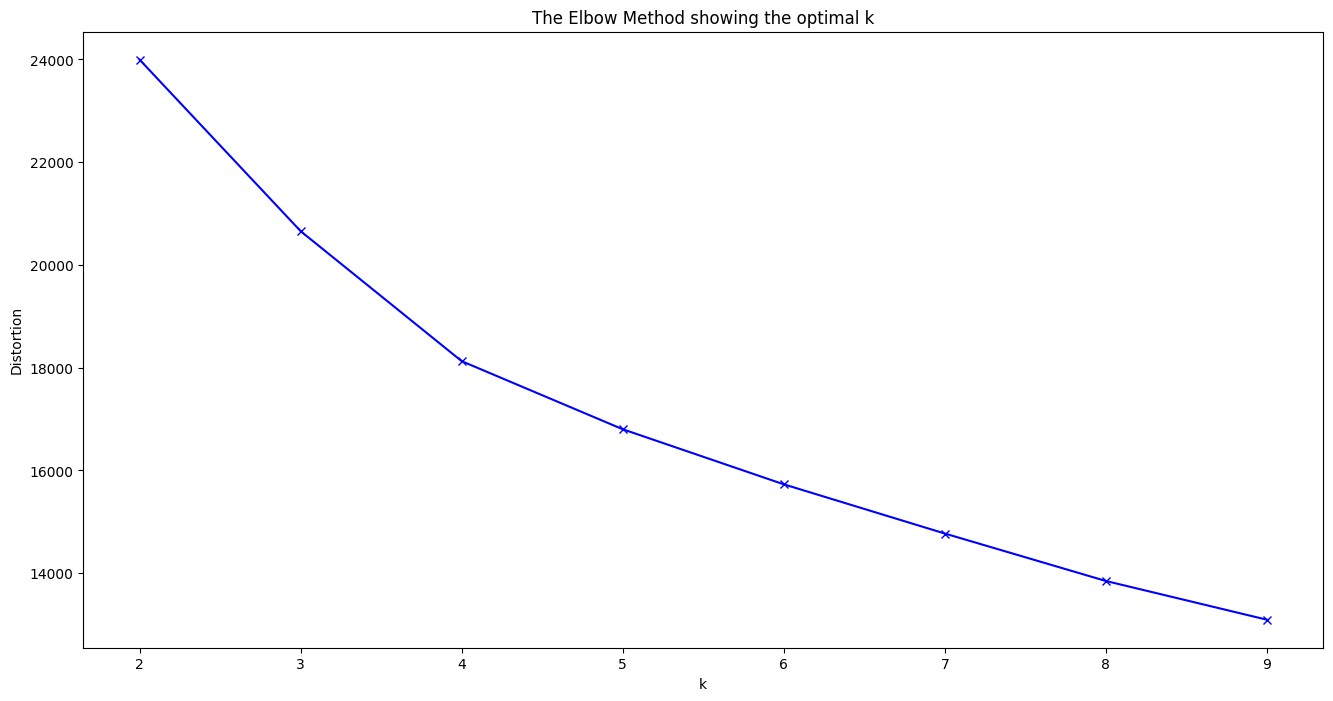

In [102]:
# Make the elbow method plot
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The plot illustrates the Elbow method for determining the optimal number of clusters, where the distortion decreases as k increases. Initially, from (k = 2) to (k = 4), the distortion drops sharply, indicating improved clustering. However, beyond (k = 4), the rate of decrease slows, signaling diminishing returns from adding more clusters. The elbow point in the curve suggests that the optimal number of clusters is at (k = 2), where the clustering is sufficiently distinct without unnecessary complexity. Thus, the best number of clusters (n_cluster) is 2

c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.30235327989710803


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.25015725355079615


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.24854861201321


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.22575883505902283


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.22430698042969394


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.21152301602782694


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.21042628005624806


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.20447166449827192


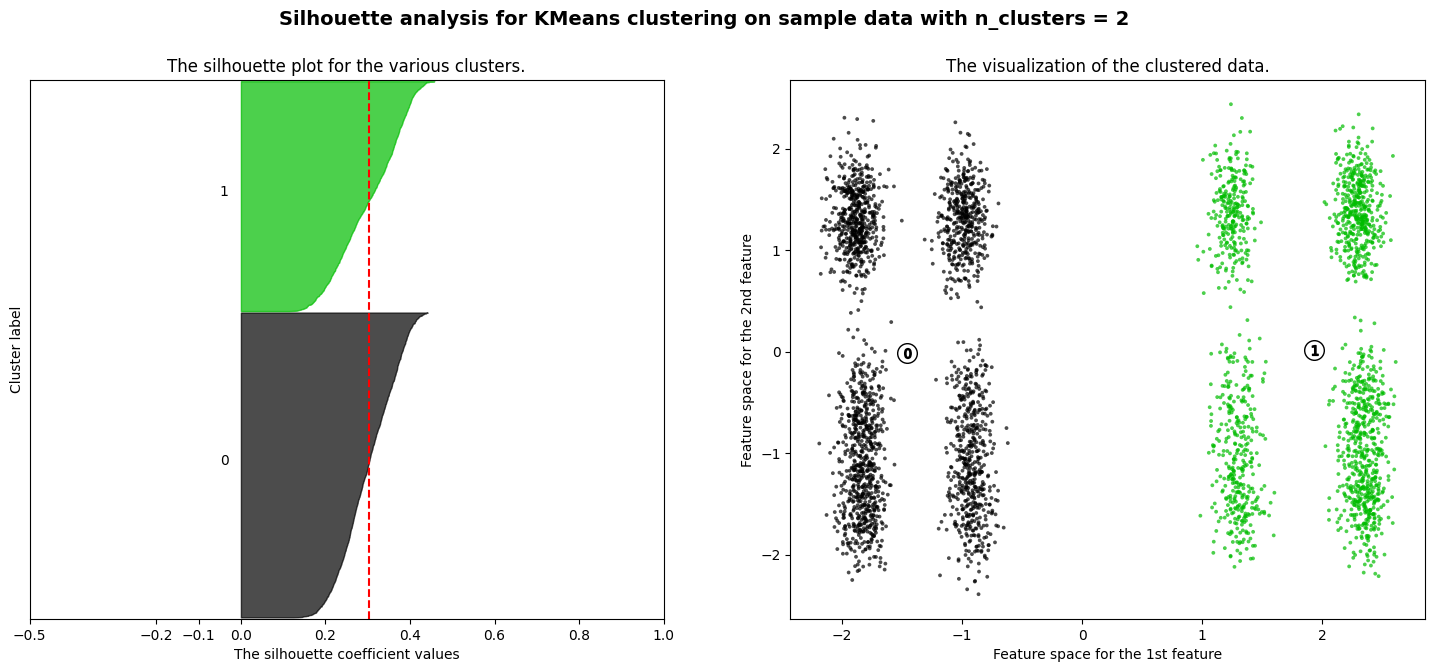

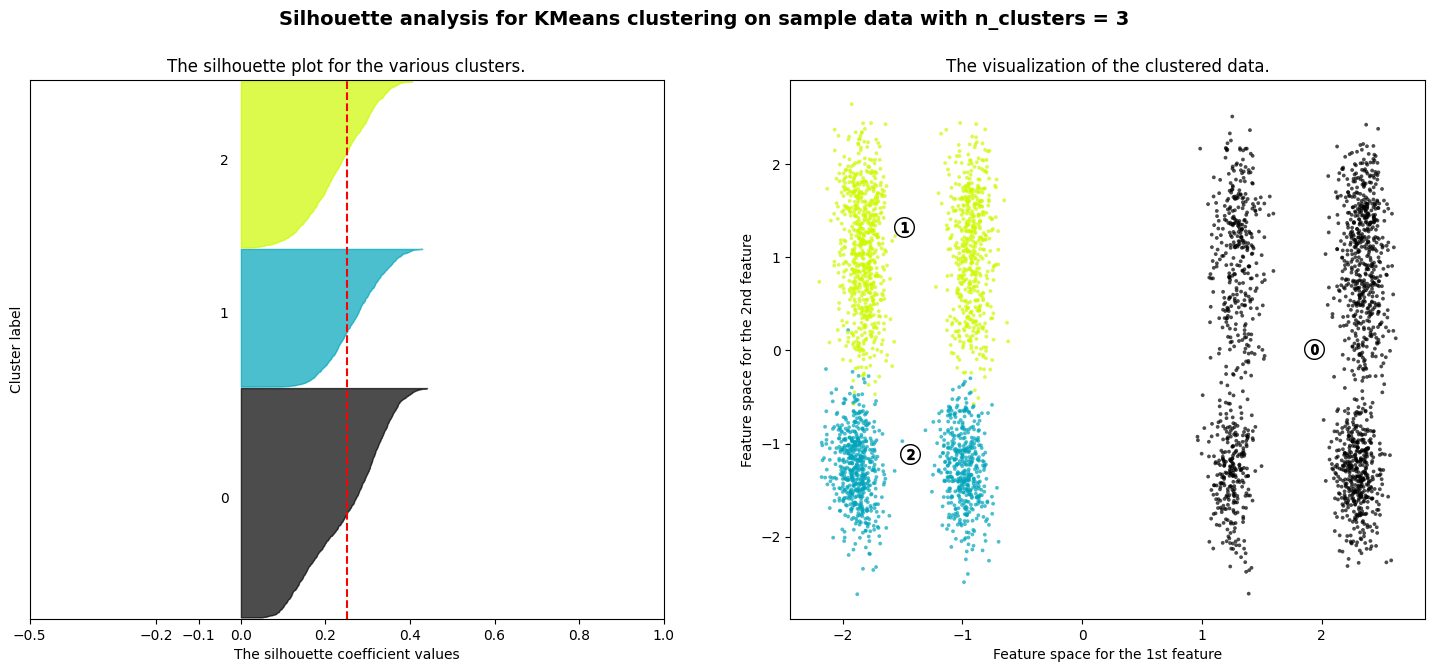

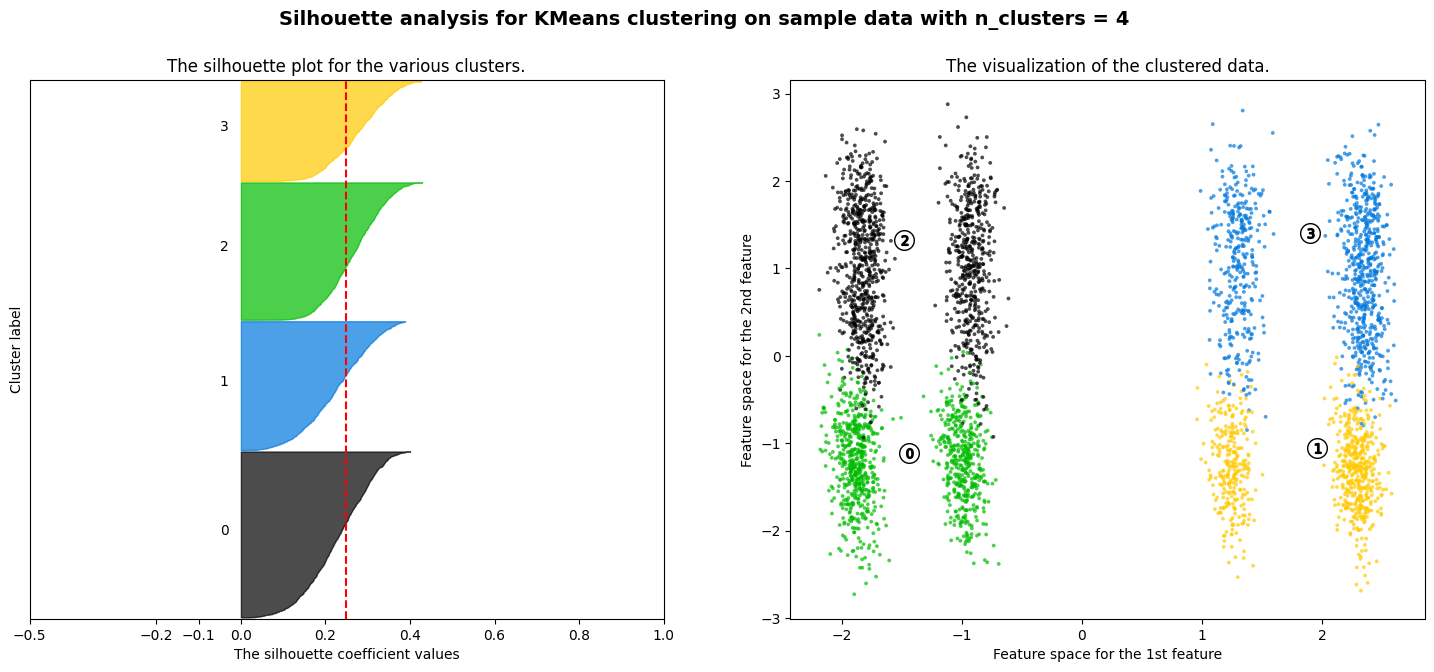

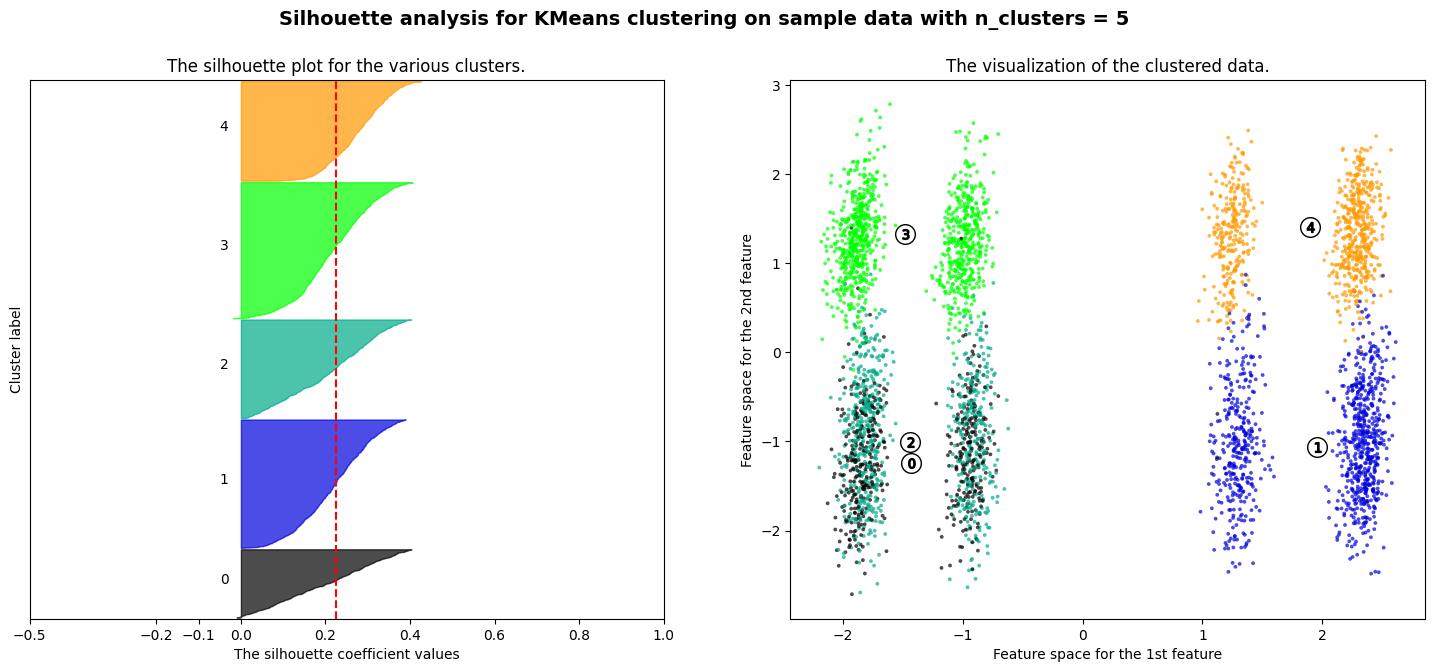

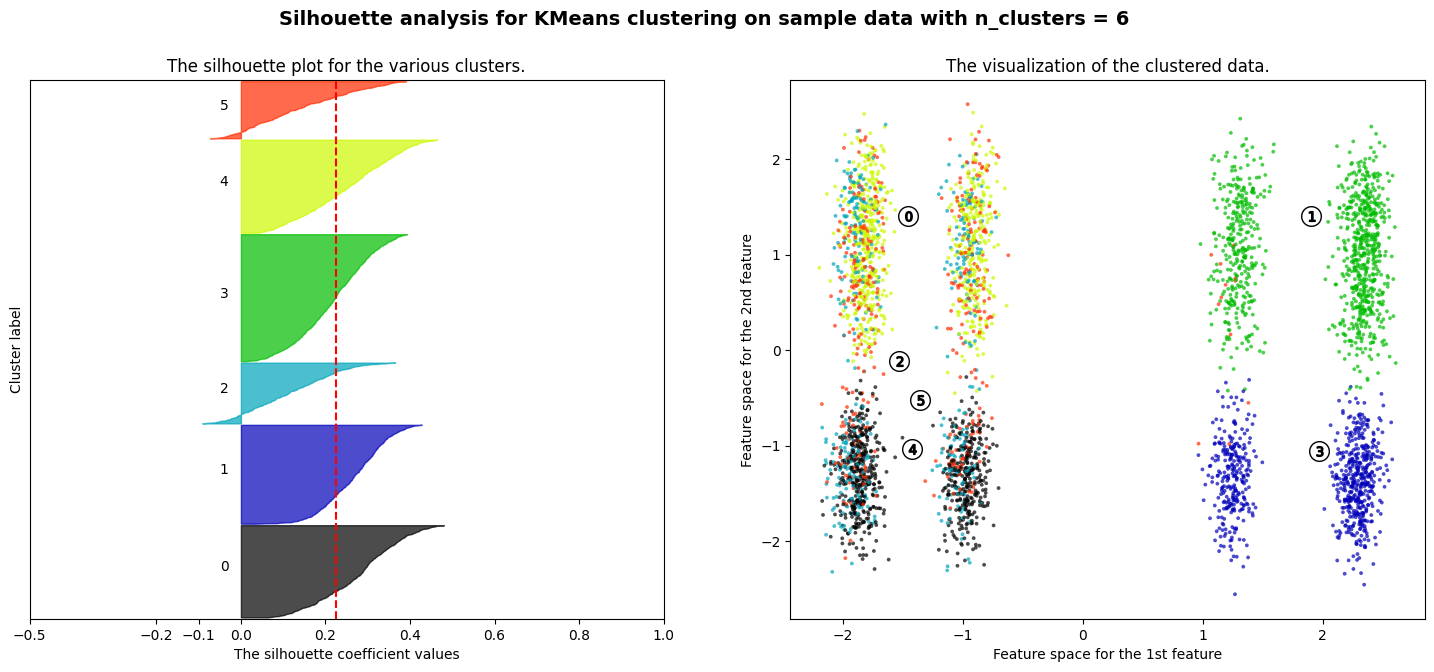

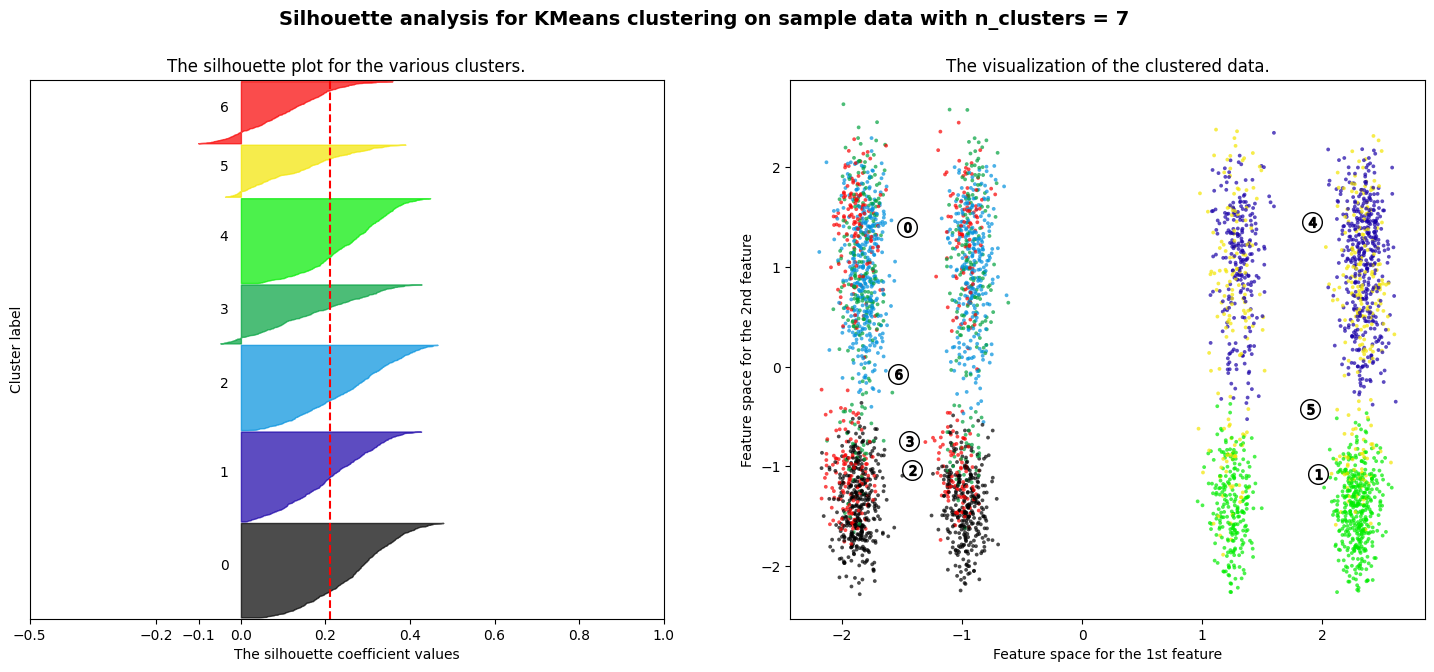

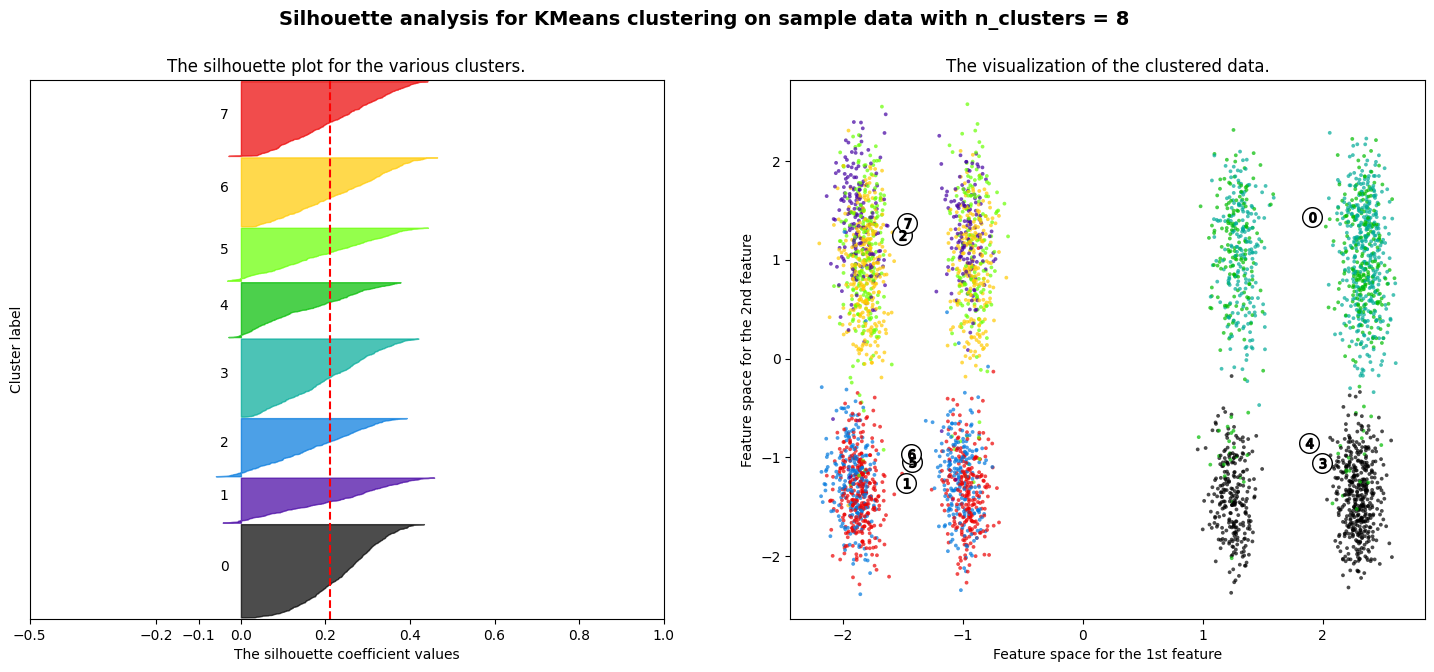

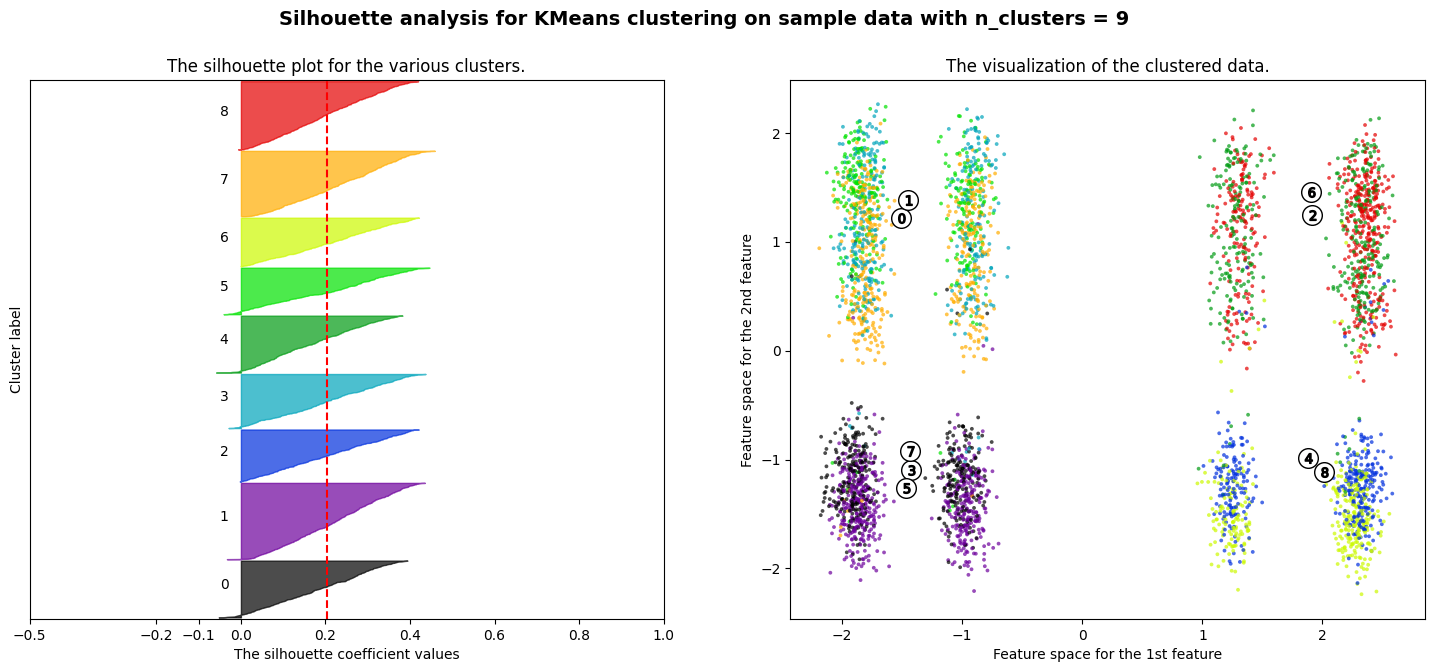

In [103]:
# Making Silhouette Analysis and Visualization of KMeans Clustering for Varying Number of Clusters
for n_clusters in K:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(data_pca) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=SEED)
    cluster_labels = clusterer.fit_predict(data_pca)

    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(data_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.5,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    pca_comp = PCA(n_components=2)
    data_pca_2 = pca_comp.fit_transform(data)

    ax2.scatter(
        data_pca_2[:, 0], data_pca_2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The silhouette analysis reveals that (n_clusters = 2) provides the best clustering solution, as most data points have high silhouette scores close to 1, indicating well-separated and compact clusters. For (n_clusters = 3) and beyond, the average silhouette scores decrease, with some clusters showing negative scores, suggesting overlap and misclassification. The visualizations confirm this trend, as the clusters become less distinct and more intertwined as the number of clusters increases. Thus, (n_clusters = 2) is the optimal choice, as it achieves the highest clustering quality with clear separation between clusters

# Fine-Tuning Cluster

c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jeremy Djohar Riyadi\AppData\Local

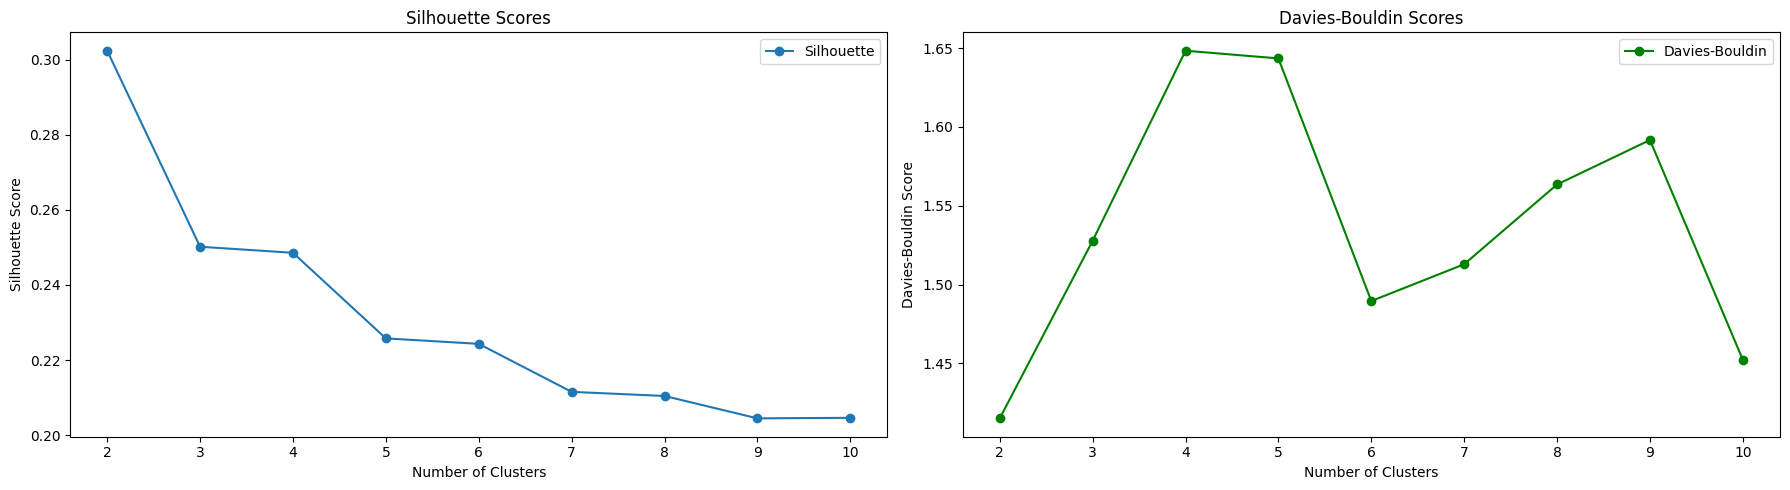

Optimal number of clusters based on silhouette score: 2
Optimal number of clusters based on Davies-Bouldin score: 2


In [110]:
from sklearn.metrics import davies_bouldin_score
from kneed import KneeLocator

# Range of clusters to evaluate
cluster_range = range(2, 11)  # Adjust range based on your needs
silhouette_scores = []
davies_bouldin_scores = []

# Loop through the range to find the best number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
    cluster_labels = kmeans.fit_predict(data_pca)
    
    # Silhouette score
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Davies-Bouldin score (lower is better)
    davies_bouldin_avg = davies_bouldin_score(data_pca, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# Plot Silhouette Scores
ax[0].plot(cluster_range, silhouette_scores, marker='o', label="Silhouette")
ax[0].set_title('Silhouette Scores')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Silhouette Score')
ax[0].legend()

# Plot Davies-Bouldin Scores
ax[1].plot(cluster_range, davies_bouldin_scores, marker='o', color='green', label="Davies-Bouldin")
ax[1].set_title('Davies-Bouldin Scores')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Davies-Bouldin Score')
ax[1].legend()

plt.tight_layout()
plt.show()

# Determine optimal clusters based on silhouette score, Davies-Bouldin score, and inertia
optimal_silhouette = cluster_range[np.argmax(silhouette_scores)]
optimal_davies_bouldin = cluster_range[np.argmin(davies_bouldin_scores)]

print(f"Optimal number of clusters based on silhouette score: {optimal_silhouette}")
print(f"Optimal number of clusters based on Davies-Bouldin score: {optimal_davies_bouldin}")

The optimal number of clusters, determined by both the silhouette score and the Davies-Bouldin score, is 2. The silhouette score indicates that with 2 clusters, the data points are well-separated and compact, achieving the highest clustering quality. Similarly, the Davies-Bouldin score, which evaluates the ratio of intra-cluster dispersion to inter-cluster separation, is minimized at 2 clusters, confirming that this configuration provides the best balance between compactness and separation. Both metrics consistently highlight 2 clusters as the most effective choice for this dataset

In [111]:
# Clustering Model Implementation Using KMeans with 2 Clusters
model = KMeans(n_clusters = 2, random_state = SEED)
pred = model.fit_predict(data_pca)
data_kmeans = data.copy()
data_kmeans['cluster']= pred
pred

c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 0, 0, 0])

In [112]:
data_kmeans

Gender  Purchase Amount (USD)      Size  Review Rating  \
0     0.685994              -0.285629 -1.203814      -0.907584   
1     0.685994               0.178852 -1.203814      -0.907584   
2     0.685994               0.558882  0.945854      -0.907584   
3     0.685994               1.276716 -0.128980      -0.349027   
4     0.685994              -0.454531 -0.128980      -1.466141   
...        ...                    ...       ...            ...   
3895 -1.457738              -1.341267 -1.203814       0.628448   
3896 -1.457738              -0.454531 -1.203814       1.047366   
3897 -1.457738              -1.130139 -1.203814      -1.186862   
3898 -1.457738               0.727784  0.945854       0.069891   
3899 -1.457738               0.896686 -0.128980      -0.907584   

      Subscription Status  Discount Applied  Promo Code Used  \
0                1.644294          1.151339         1.151339   
1                1.644294          1.151339         1.151339   
2                1.644294          1.151339         1.151339   
3                1.644294          1.151339         1.151339   
4                1.644294          1.151339         1.151339   
...                   ...               ...              ...   
3895            -0.608164         -0.868554        -0.868554   
3896            -0.608164         -0.868554        -0.868554   
3897            -0.608164         -0.868554        -0.868554   
3898            -0.608164         -0.868554        -0.868554   
3899            -0.608164         -0.868554        -0.868554   

      Previous Purchases       Age  Category_Accessories  ...  \
0              -0.785831  0.715892             -0.682763  ...   
1              -1.616552 -1.651418             -0.682763  ...   
2              -0.162789  0.387099             -0.682763  ...   
3               1.637107 -1.519901             -0.682763  ...   
4               0.391025  0.058306             -0.682763  ...   
...                  ...       ...                   ...  ...   
3895            0.460252 -0.270487             -0.682763  ...   
3896            1.083293  0.518616              1.464637  ...   
3897           -0.093563  0.124065              1.464637  ...   
3898           -0.093563 -0.007453             -0.682763  ...   
3899            0.529479  0.518616              1.464637  ...   

      Preferred Payment Method_Credit Card  \
0                                -0.455856   
1                                -0.455856   
2                                 2.193677   
3                                -0.455856   
4                                -0.455856   
...                                    ...   
3895                             -0.455856   
3896                             -0.455856   
3897                             -0.455856   
3898                             -0.455856   
3899                             -0.455856   

      Preferred Payment Method_Debit Card  Preferred Payment Method_PayPal  \
0                               -0.441422                        -0.458315   
1                               -0.441422                        -0.458315   
2                               -0.441422                        -0.458315   
3                               -0.441422                         2.181905   
4                               -0.441422                         2.181905   
...                                   ...                              ...   
3895                            -0.441422                        -0.458315   
3896                            -0.441422                        -0.458315   
3897                            -0.441422                        -0.458315   
3898                            -0.441422                        -0.458315   
3899                            -0.441422                        -0.458315   

      Preferred Payment Method_Venmo  Frequency of Purchases_Annually  \
0                           2.269674                        -0.414578   
1                          -0

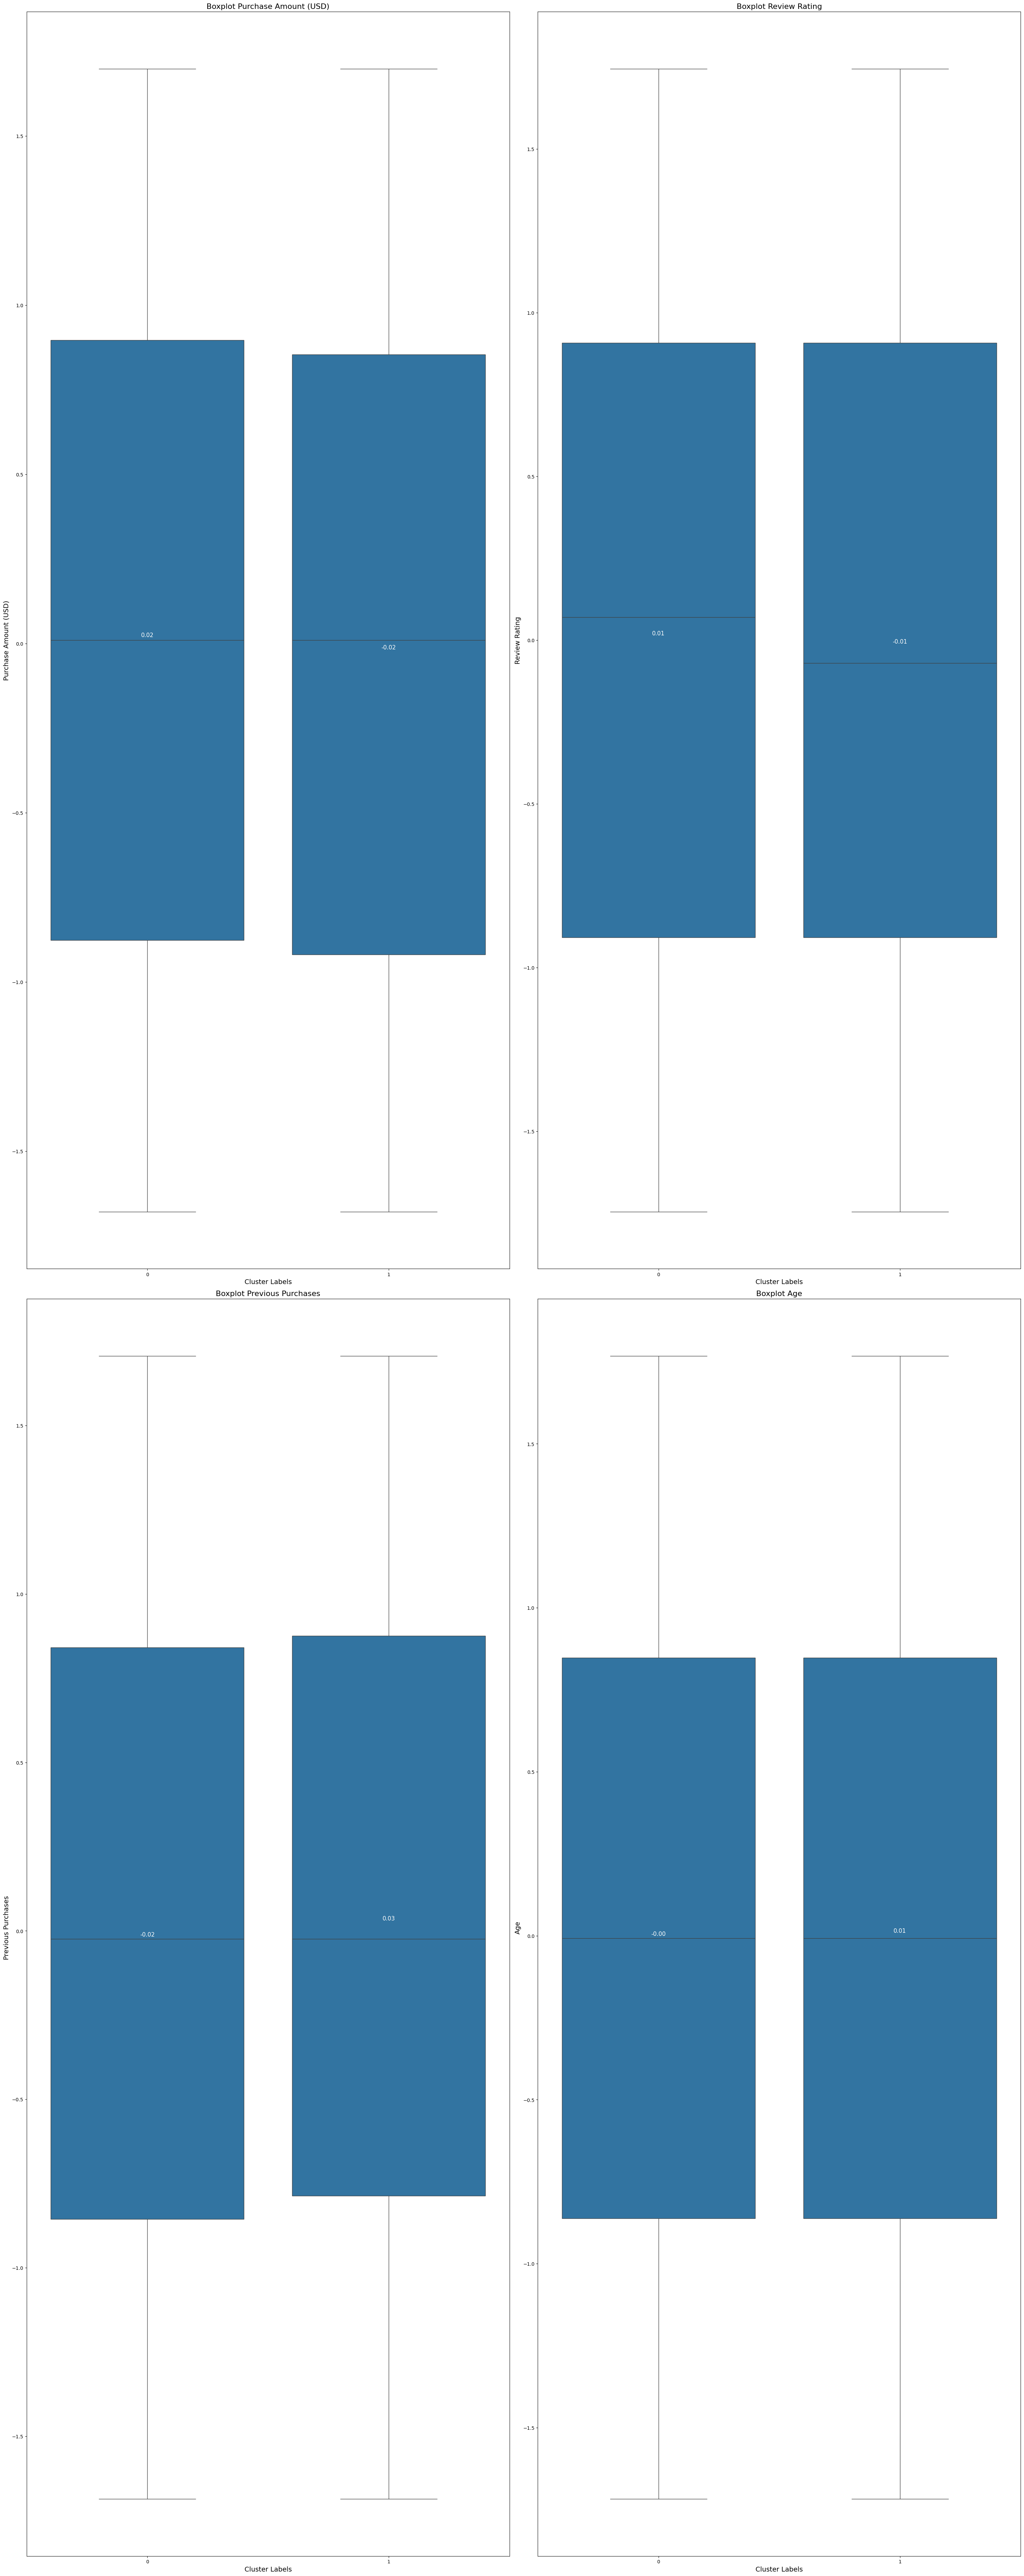

In [113]:
# Plotting
plt.figure(figsize=(30, 150))
for i, fitur in enumerate(num_cols, 1):
    plt.subplot(len(num_cols),2, i)
    sns.boxplot(x='cluster', y=fitur, data=data_kmeans, showfliers=False)  # Menghilangkan outliers dan menggunakan palet warna Set3
    plt.xlabel('Cluster Labels', fontsize=14)
    plt.ylabel(fitur, fontsize=14)
    plt.title(f'Boxplot {fitur}', fontsize=16)
    
    # Adding Mean to the boxplot
    means = data_kmeans.groupby('cluster')[fitur].mean().values
    for j, mean in enumerate(means):
        plt.text(j, mean, f'{mean:.2f}', ha='center', va='bottom', color='white', fontsize=12)

plt.tight_layout()
plt.show()

The boxplots compare the distribution of four different features (purchase amount, review rating, previous purchases, and age) across the two clusters. Each box represents a cluster, with the horizontal line in the middle indicating the mean value for the respective feature. The distributions for both clusters appear similar across all features, as the means and ranges of values are nearly identical. This suggests that the two clusters may not be strongly differentiated by these features, indicating limited variation between the groups in terms of these specific characteristics. Further analysis might be required to identify other features that better distinguish the clusters

<Axes: >

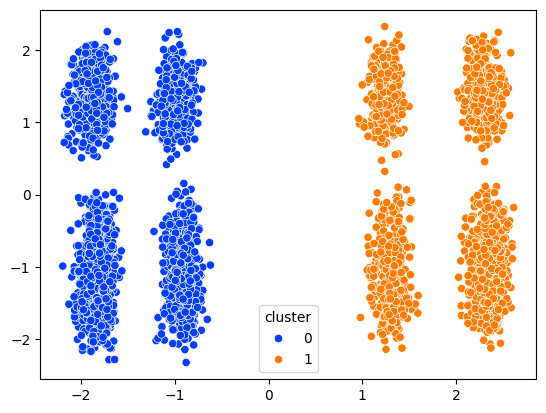

In [114]:
# Scatterplot
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=data_kmeans['cluster'], palette='bright')

The scatter plot visualizes the clustering results of the KMeans model with (n_clusters = 2). The data points are projected onto two principal components (PCA-transformed features), with each cluster represented by a different color: blue for cluster 0 and orange for cluster 1. The clusters are well-separated, indicating the model successfully distinguished two distinct groups within the dataset. The symmetry and spacing between clusters suggest that the data structure supports the decision to use two clusters, aligning with previous evaluations using silhouette and Davies-Bouldin scores. This visualization reinforces the conclusion that(n_clusters = 2) is the optimal choice for this dataset

In [115]:
# Cluster Distribution
data_kmeans['cluster'].value_counts()

cluster
0    2223
1    1677
Name: count, dtype: int64

The cluster distribution shows that the KMeans model assigned 2,223 data points to cluster 0 and 1,677 data points to cluster 1. This indicates that the dataset is slightly imbalanced, with more data points belonging to cluster 0